# Estimation of obesity levels based on eating habits and physical condition Data Set

## Data Set Information:

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

## Attributes
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). 

The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS), other variables obtained were: Gender, Age, Height and Weight. 

Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df=data.copy()

In [4]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data.columns = ['Gender', 
                'Age', 
                'Height', 
                'Weight', 
                'Family History with Overweight',
                'Frequent Consumption of High Caloric Food', 
                'Frequency of Consumption of Vegetables', 
                'Number of Main Meals', 
                'Consumption of Food Between Meals', 
                'Smoke', 
                'Consumption of Water Daily', 
                'Calories Consumption Monitoring', 
                'Physical Activity Frequency', 
                'Time Using Technology Devices',
                'Consumption of Alcohol', 
                'Transportation Used', 
                'Obesity Level']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   Family History with Overweight             2111 non-null   object 
 5   Frequent Consumption of High Caloric Food  2111 non-null   object 
 6   Frequency of Consumption of Vegetables     2111 non-null   float64
 7   Number of Main Meals                       2111 non-null   float64
 8   Consumption of Food Between Meals          2111 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Consumption of Water Dai

In [7]:
data.shape

(2111, 17)

In [8]:
data.isnull().sum().sum() 

0

In [9]:
print("Continuous Variables\n")
continous_vars=data.describe().columns
print(continous_vars)

Continuous Variables

Index(['Age', 'Height', 'Weight', 'Frequency of Consumption of Vegetables',
       'Number of Main Meals', 'Consumption of Water Daily',
       'Physical Activity Frequency', 'Time Using Technology Devices'],
      dtype='object')


In [10]:
print("Categorical Variables\n")
categorical_vars=data.describe(include=[object]).columns
print(categorical_vars)

Categorical Variables

Index(['Gender', 'Family History with Overweight',
       'Frequent Consumption of High Caloric Food',
       'Consumption of Food Between Meals', 'Smoke',
       'Calories Consumption Monitoring', 'Consumption of Alcohol',
       'Transportation Used', 'Obesity Level'],
      dtype='object')


# Numeric Data

In [11]:
print('Count of Features per Data Type:')
data.dtypes.value_counts() 

Count of Features per Data Type:


object     9
float64    8
dtype: int64

In [12]:
data.tail()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent Consumption of High Caloric Food,Frequency of Consumption of Vegetables,Number of Main Meals,Consumption of Food Between Meals,Smoke,Consumption of Water Daily,Calories Consumption Monitoring,Physical Activity Frequency,Time Using Technology Devices,Consumption of Alcohol,Transportation Used,Obesity Level
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [13]:
data['Height'] = data['Height'].round(2) #meter
data['Weight'] = data['Weight'].round(2) #kg
data['Age'] = data['Age'].round()  #When we examine the data, there are float ages.

In [14]:
data.tail()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent Consumption of High Caloric Food,Frequency of Consumption of Vegetables,Number of Main Meals,Consumption of Food Between Meals,Smoke,Consumption of Water Daily,Calories Consumption Monitoring,Physical Activity Frequency,Time Using Technology Devices,Consumption of Alcohol,Transportation Used,Obesity Level
2106,Female,21.0,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22.0,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23.0,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.0,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24.0,1.74,133.47,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [15]:
desc = data.describe()
desc[["Age","Height","Weight"]] 
#The ages in the data vary between 14-61. Average age is 24.
#Height values in the data vary between 1.45-1.98. Average height is 1.70.
#Weight values in the data vary between 39-173. The average weight is 86.58.

,Age,Height,Weight
count,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035
std,6.357078,0.093368,26.191163
min,14.000000,1.450000,39.000000
25%,20.000000,1.630000,65.470000
50%,23.000000,1.700000,83.000000
75%,26.000000,1.770000,107.430000
max,61.000000,1.980000,173.000000


In [16]:
corr = data.corr()

In [17]:
corr=corr.loc[["Age","Height","Weight"],["Age","Height","Weight"]]
corr

,Age,Height,Weight
Age,1.000000,-0.025775,0.203451
Height,-0.025775,1.000000,0.462264
Weight,0.203451,0.462264,1.000000


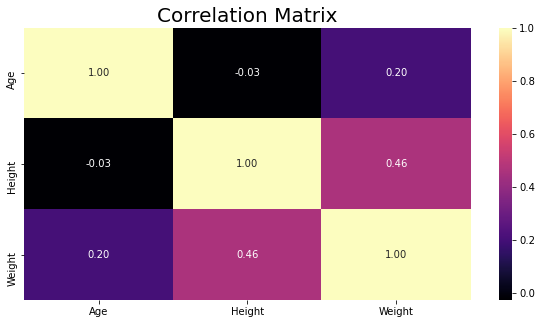

In [18]:
f, ax = plt.subplots(figsize= [10,5])
sns.heatmap(corr, annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()  

## Outliers

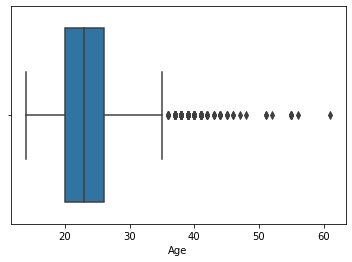

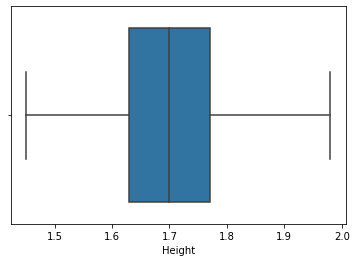

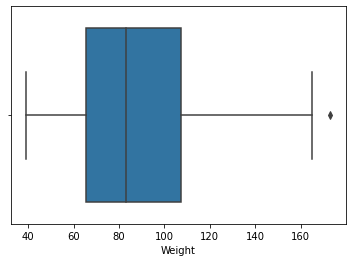

In [19]:
for col in ["Age","Height","Weight"]:
    
    sns.boxplot(data[col])
    plt.show()

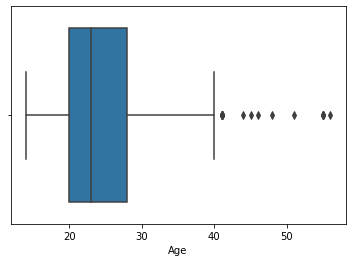

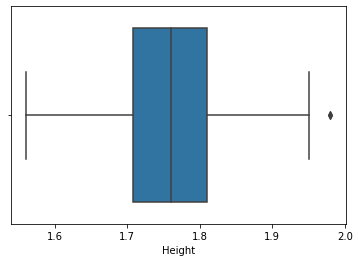

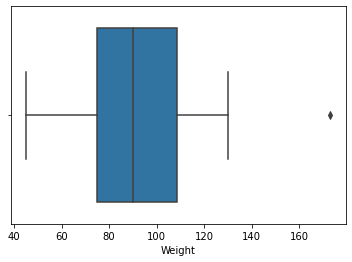

In [20]:
male = data[data["Gender"] == "Male"]
for col in ["Age","Height","Weight"]:
    sns.boxplot(male[col])
    plt.show()

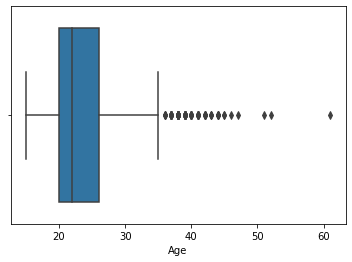

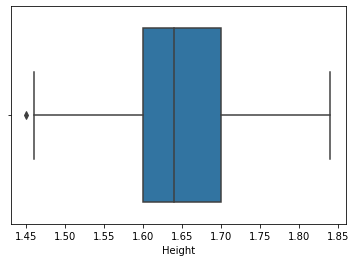

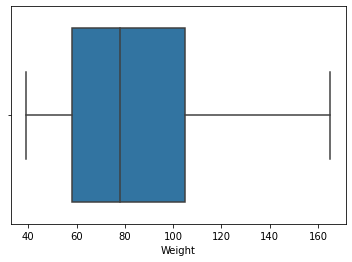

In [21]:
female = data[data["Gender"] == "Female"]
for col in ["Age","Height","Weight"]:
    sns.boxplot(female[col])
    plt.show()


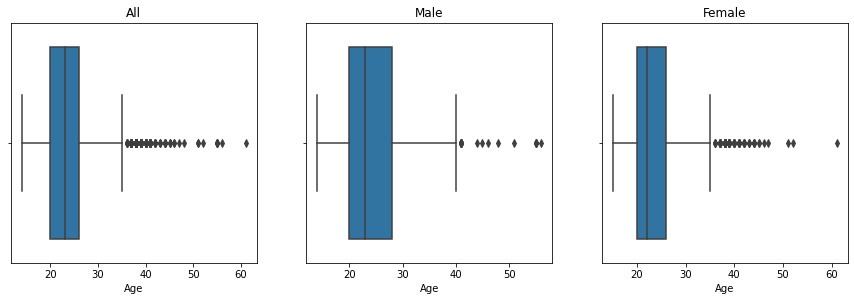

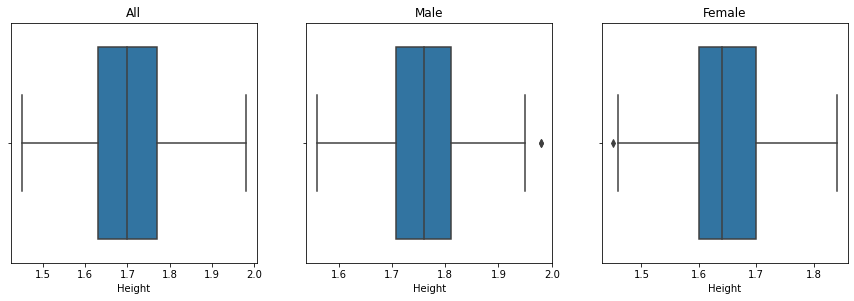

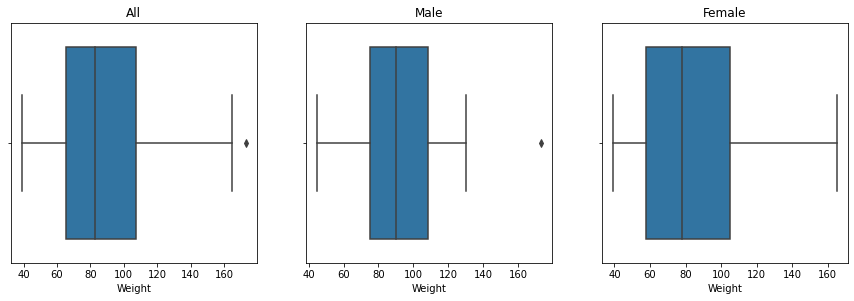

In [22]:
female = data[data["Gender"] == "Female"]
male = data[data["Gender"] == "Male"]
i = 1
for col in ["Age","Height","Weight"]:
    plt.figure(figsize=[15,15])
    
    plt.subplot(3,3,i)
    sns.boxplot(data[col])
    plt.title("All")
    
    plt.subplot(3,3,i+1)
    sns.boxplot(male[col])
    plt.title("Male")
    
    plt.subplot(3,3,i+2)
    sns.boxplot(female[col])
    plt.title("Female")
    i+=3  
plt.show()

# Categoric Data

It seems that all the attributes except age height weight are actually categorical data. Attributes that are categorical but appear as numeric must be converted to categorical data.

In [23]:
numeric = ['Frequency of Consumption of Vegetables', 
           'Number of Main Meals', 
           'Consumption of Water Daily', 
           'Physical Activity Frequency', 
           'Time Using Technology Devices']
for i in numeric:
    data[i] = data[i].apply(round)

In [24]:
mapping =  [{1:'Never', 2:'Sometimes', 3:'Always'},
            {1: '1', 2:'2' , 3: '3', 4: '3+'},
            {1: 'Less than a liter', 2:'Between 1 and 2 L', 3:'More than 2 L'},
            {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'},
            {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}]

In [25]:
j=0
for i in numeric:
    data[i]=data[i].replace(mapping[j])
    j+=1

In [26]:
categorical_vars = numeric + list(categorical_vars)

In [27]:
for i in categorical_vars:
    print(f'-----------{i}---------')
    print(data[i].value_counts())

-----------Frequency of Consumption of Vegetables---------
Sometimes    1013
Always        996
Never         102
Name: Frequency of Consumption of Vegetables, dtype: int64
-----------Number of Main Meals---------
3     1470
1      316
2      176
3+     149
Name: Number of Main Meals, dtype: int64
-----------Consumption of Water Daily---------
Between 1 and 2 L    1110
More than 2 L         516
Less than a liter     485
Name: Consumption of Water Daily, dtype: int64
-----------Physical Activity Frequency---------
1 or 2 days      776
I do not have    720
2 or 4 days      496
4 or 5 days      119
Name: Physical Activity Frequency, dtype: int64
-----------Time Using Technology Devices---------
0–2 hours            952
3–5 hours            915
More than 5 hours    244
Name: Time Using Technology Devices, dtype: int64
-----------Gender---------
Male      1068
Female    1043
Name: Gender, dtype: int64
-----------Family History with Overweight---------
yes    1726
no      385
Name: Family His

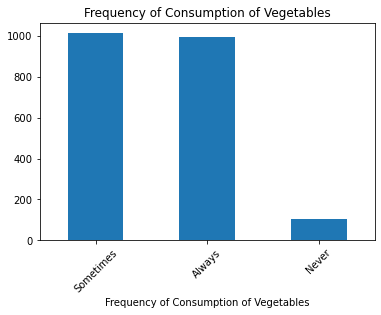

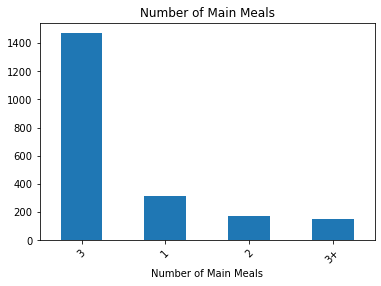

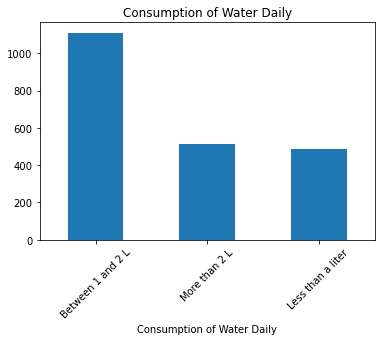

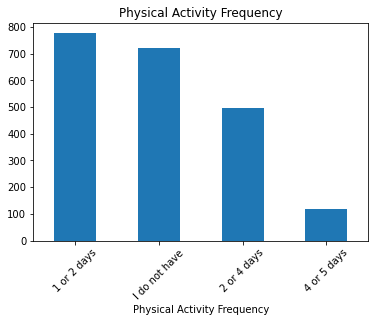

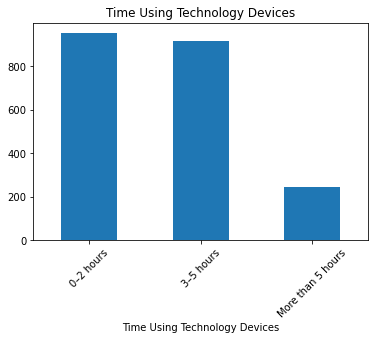

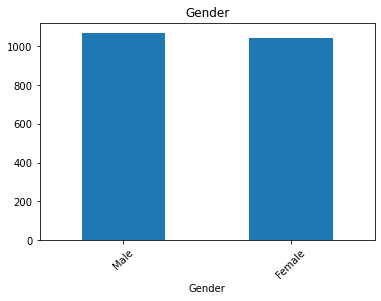

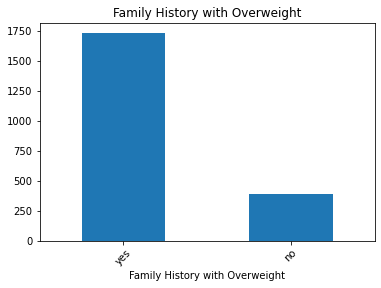

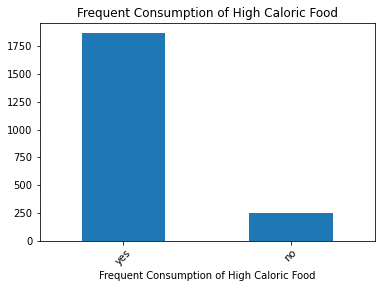

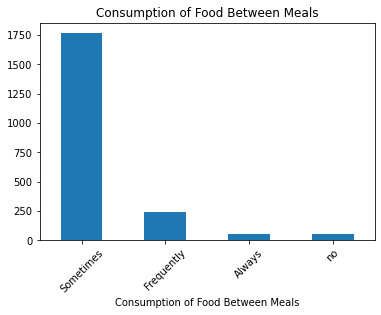

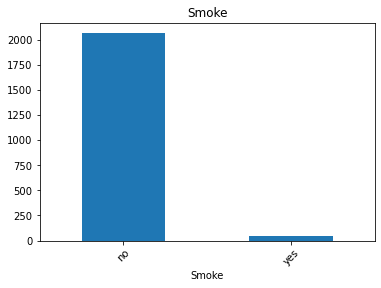

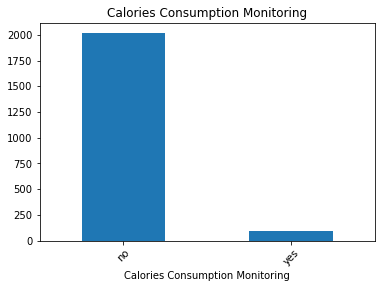

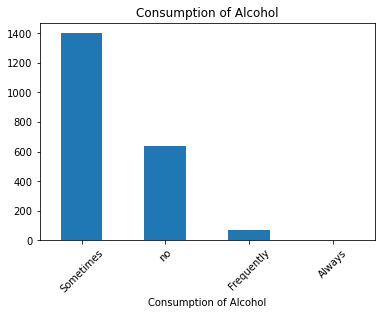

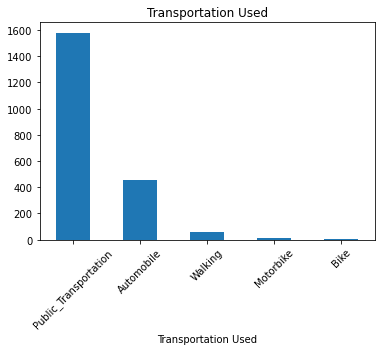

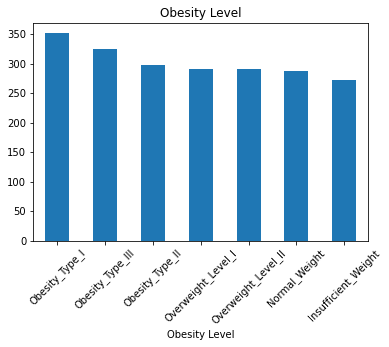

In [28]:
#Bar plotting for each categorical attribute
for i in categorical_vars:
    data[i].value_counts().plot.bar()
    plt.xlabel(i)
    plt.title(i)
    plt.xticks(rotation=45)
    plt.show()

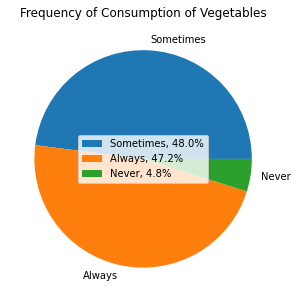

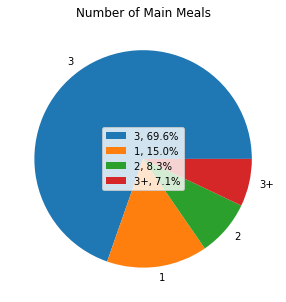

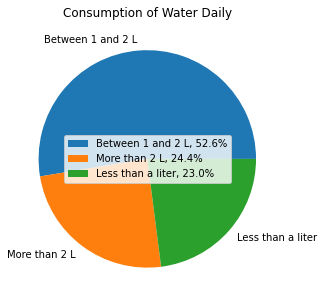

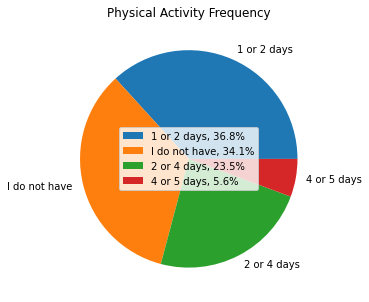

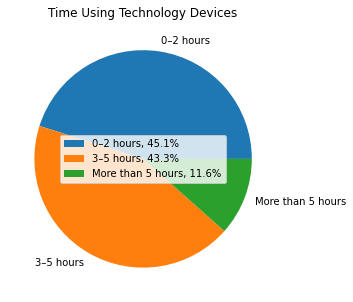

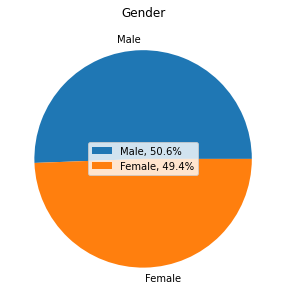

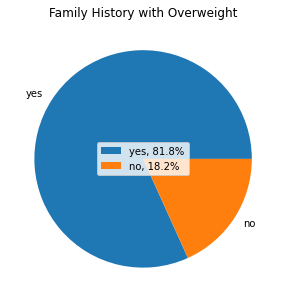

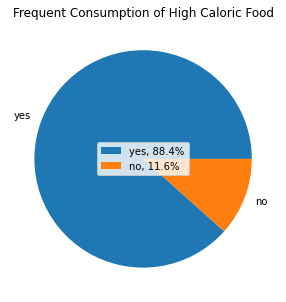

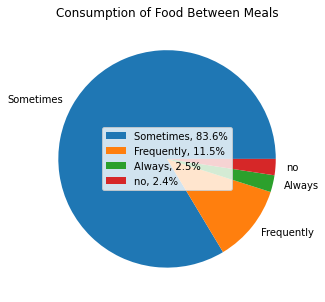

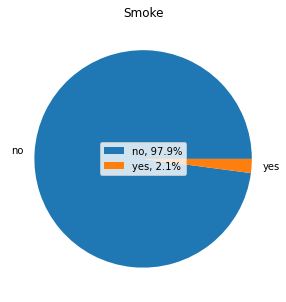

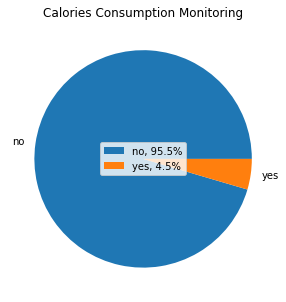

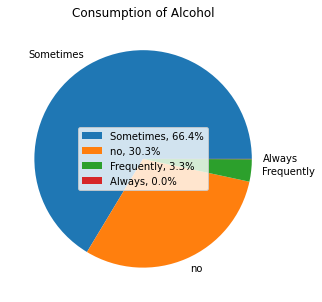

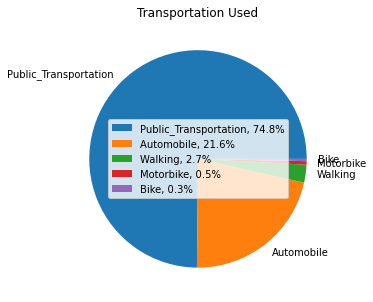

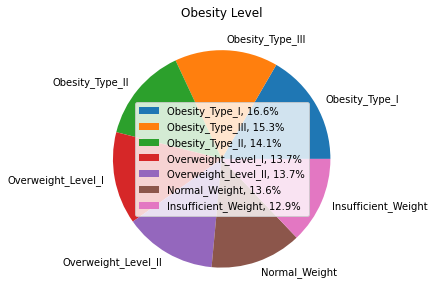

In [29]:
#Pie plotting for each categorical attribute
for i in categorical_vars:
    values = data[i].value_counts().values
    labels = data[i].value_counts().index
    plt.figure(figsize=[5,5])
    plt.pie(values,labels=labels)
    plt.title(i)
    percents = (values/values.sum())*100
    plt.legend(labels=[f'{l}, {v:.1f}%' for l, v in zip(labels, percents)],
               loc="center",
               #bbox_to_anchor=(1.5, 0, 0, 0),
               fontsize=10)
    plt.show()

In [30]:
categorical_vars.remove("Gender")

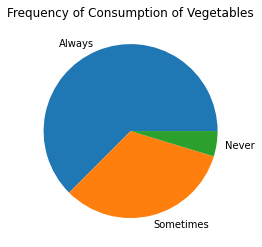

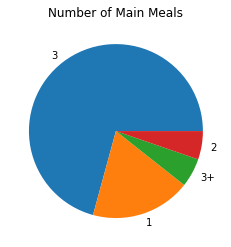

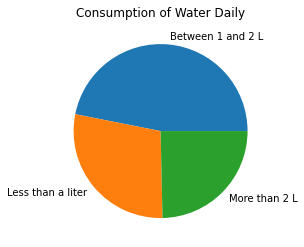

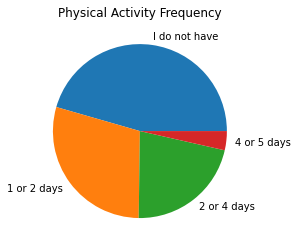

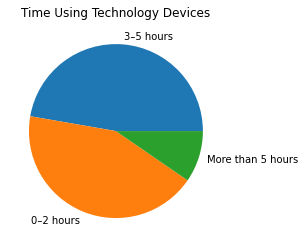

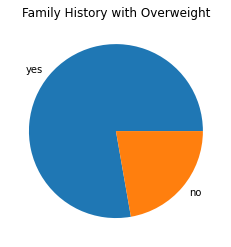

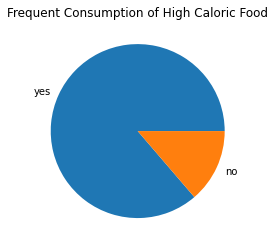

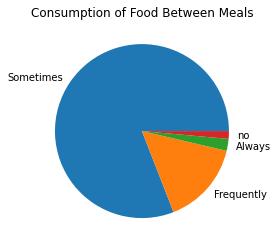

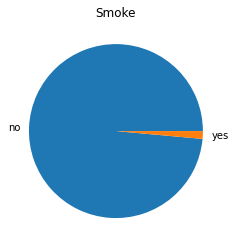

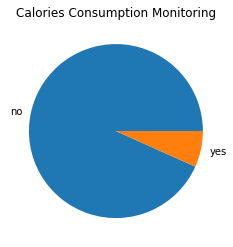

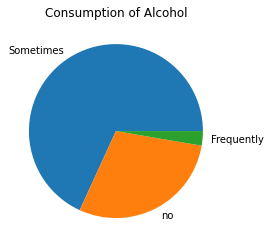

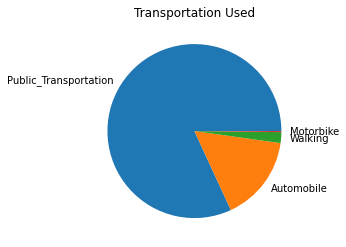

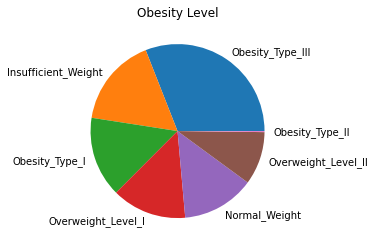

In [31]:
female = data[data["Gender"] == "Female"]
for i in categorical_vars:
    female[i].value_counts().plot.pie()
    plt.title(i)
    plt.ylabel("")
    plt.show()

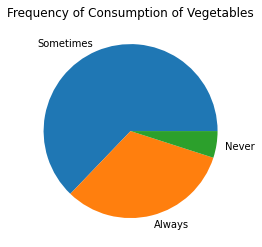

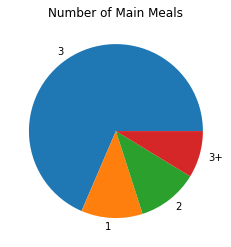

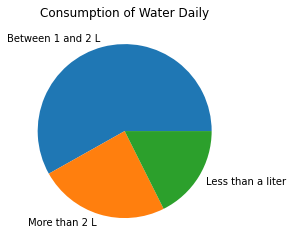

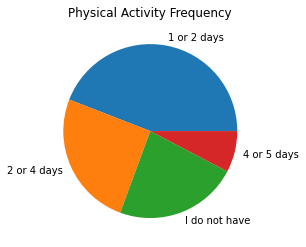

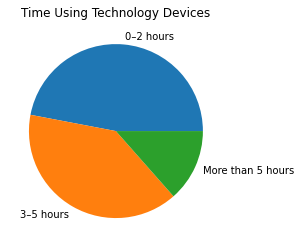

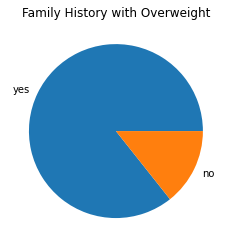

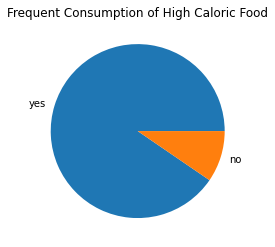

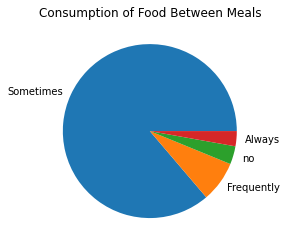

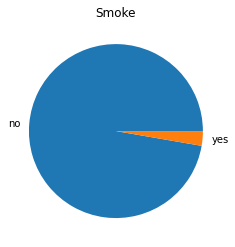

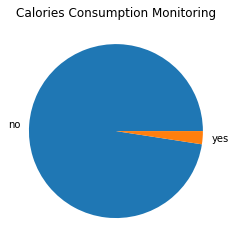

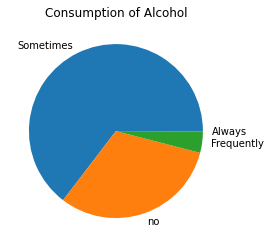

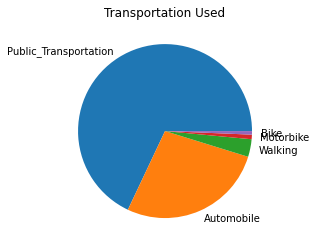

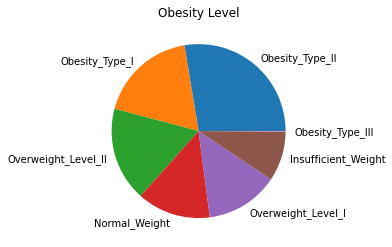

In [32]:
male = data[data["Gender"] == "Male"]
for i in categorical_vars:
    male[i].value_counts().plot.pie()
    plt.title(i)
    plt.ylabel("")
    plt.show()

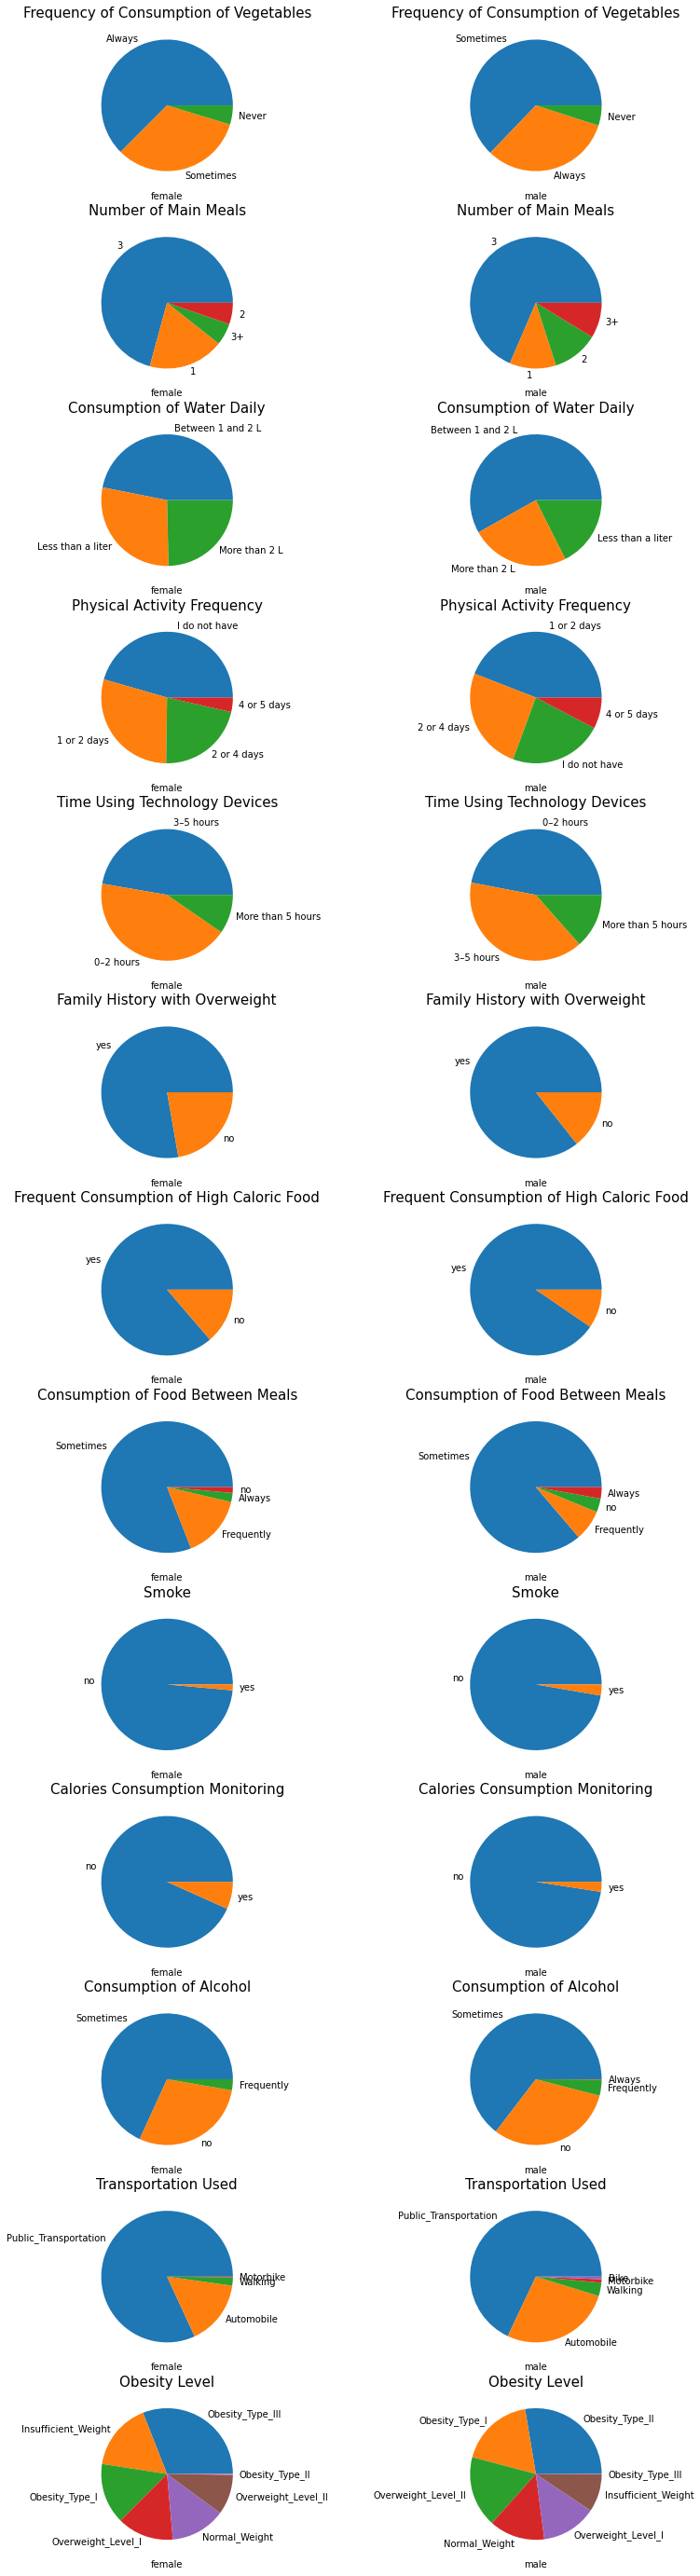

In [33]:
male = data[data["Gender"] == "Male"]
female = data[data["Gender"] == "Female"]
num=1
plt.figure(figsize=[13,50])
for i in categorical_vars:
    
    plt.subplot(len(categorical_vars),2,num)
    
    female[i].value_counts().plot.pie()
    plt.title(i,fontsize=15)
    plt.ylabel("")
    plt.xlabel("female")
    num+=1

    plt.subplot(len(categorical_vars),2,num)
   
    male[i].value_counts().plot.pie()
    plt.title(i,fontsize=15)
    plt.ylabel("")
    plt.xlabel("male")
    num+=1
plt.show()

In [34]:
categorical_vars.insert(0,"Gender")

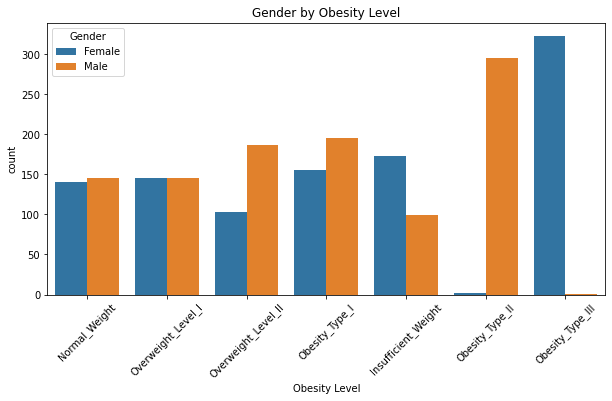

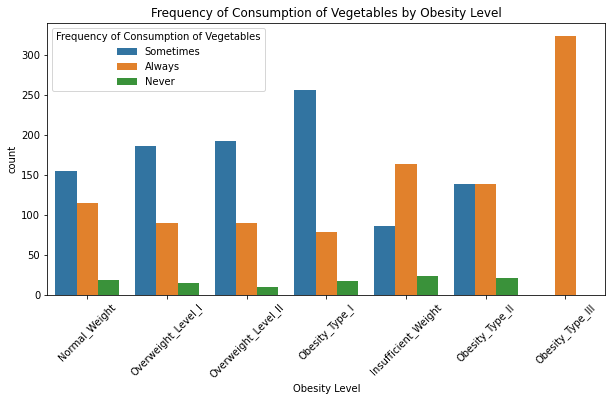

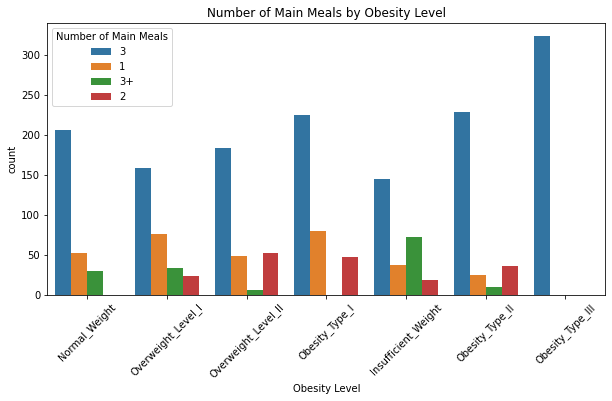

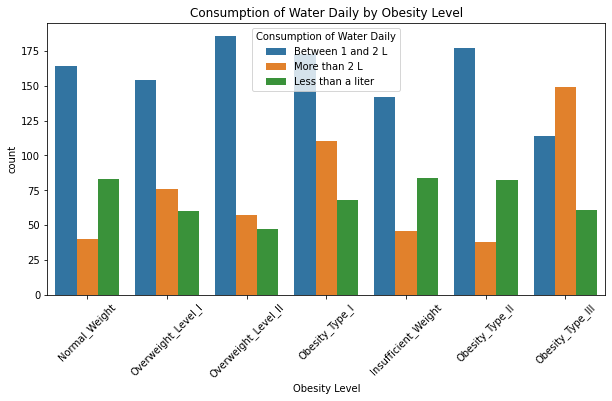

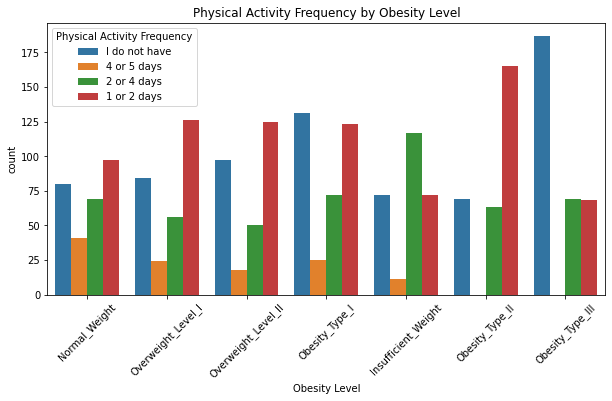

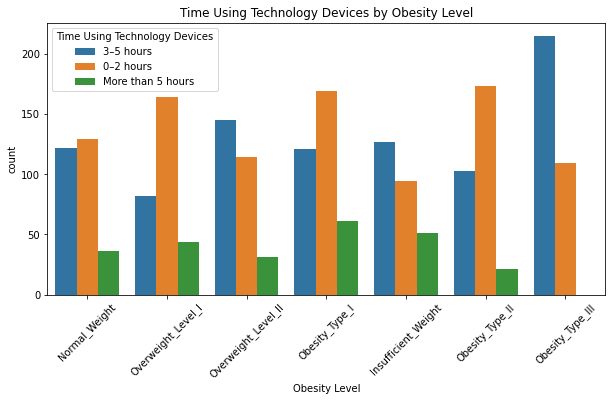

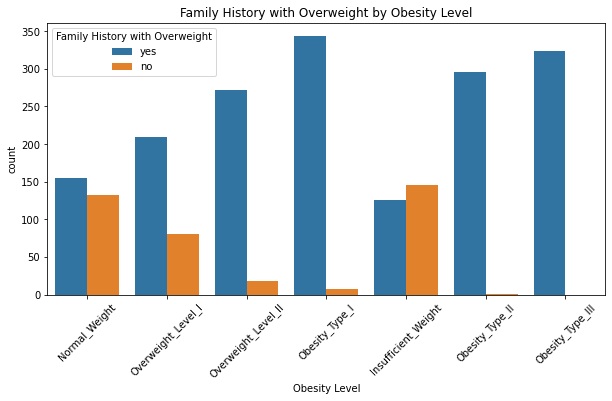

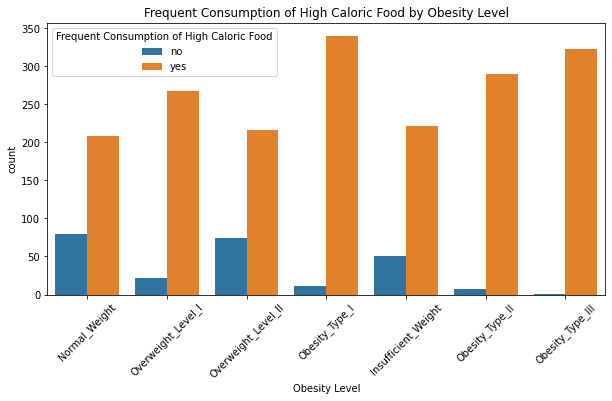

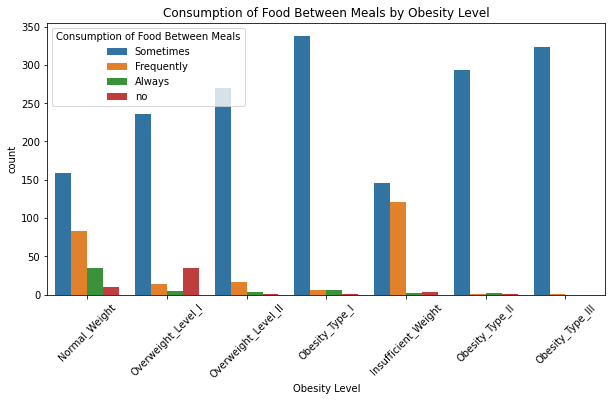

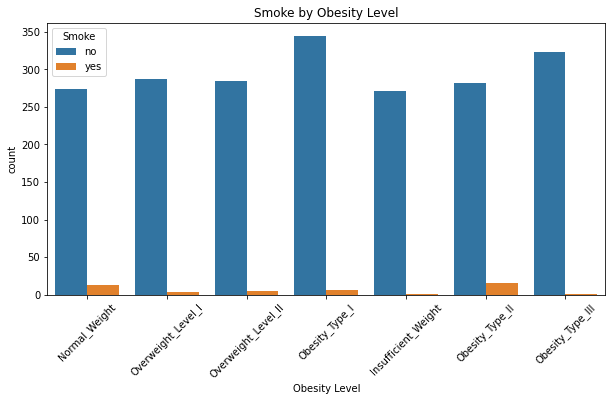

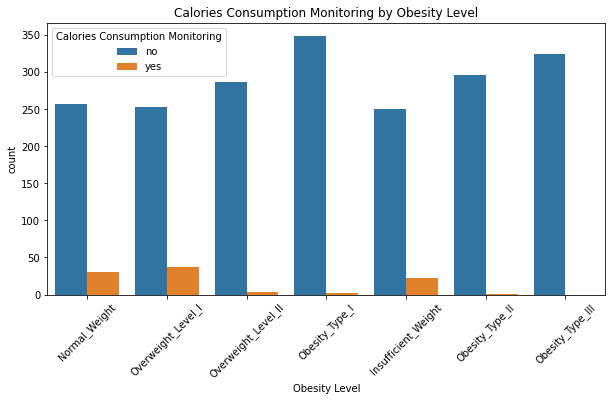

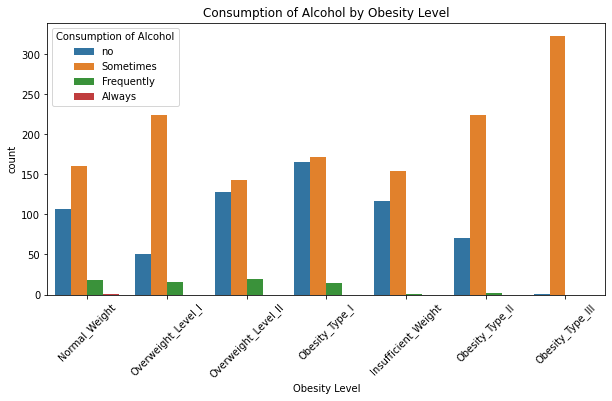

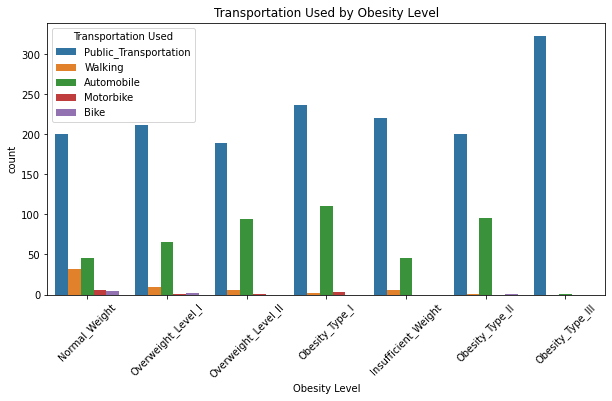

In [35]:
#Data in all categorical attributes according to obesity levels
categorical_vars.remove("Obesity Level")
for i in categorical_vars:
    plt.figure(figsize=[10,5])
    sns.countplot(x="Obesity Level",hue=i, data=data)
    plt.legend(loc='best', title=i)
    plt.title(i+" by Obesity Level")
    plt.xticks(rotation=45)
    plt.show()
categorical_vars.insert(len(categorical_vars),"Obesity Level")

# Label Encoder

In [36]:
df = data.copy()

In [37]:
df.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent Consumption of High Caloric Food,Frequency of Consumption of Vegetables,Number of Main Meals,Consumption of Food Between Meals,Smoke,Consumption of Water Daily,Calories Consumption Monitoring,Physical Activity Frequency,Time Using Technology Devices,Consumption of Alcohol,Transportation Used,Obesity Level
0,Female,21.0,1.62,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,I do not have,3–5 hours,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,Always,3,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Public_Transportation,Overweight_Level_II


In [38]:
for i in categorical_vars[:-1]:
    le=preprocessing.LabelEncoder()
    data[i] = le.fit_transform(data[i])

In [39]:
data.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent Consumption of High Caloric Food,Frequency of Consumption of Vegetables,Number of Main Meals,Consumption of Food Between Meals,Smoke,Consumption of Water Daily,Calories Consumption Monitoring,Physical Activity Frequency,Time Using Technology Devices,Consumption of Alcohol,Transportation Used,Obesity Level
0,0,21.0,1.62,64.0,1,0,2,2,2,0,0,0,3,1,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,0,2,2,1,2,1,2,0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2,2,2,0,0,0,1,1,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,0,2,2,0,0,0,1,0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2,0,2,0,0,0,3,0,2,3,Overweight_Level_II


# Age Height Weight 

In [40]:
data = data.drop(["Age","Height","Weight"],axis=1)

From these values, it can be inferred whether people are obese, so after subtracting these attribute values, only the remaining questions about the health of people will be given to the algorithms to predict.

# Train Test Splitting

In [41]:
y = data["Obesity Level"]
x = data.drop("Obesity Level",axis=1) 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.1)
print("Shapes")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Shapes
(1899, 13)
(212, 13)
(1899,)
(212,)


# KNN

In [42]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))
weight = ['uniform', 'distance']
algorithm = ["auto","ball_tree","kd_tree","brute"]
metric= ["euclidean","minkowski","chebyshev","manhattan"]

param_grid = dict(n_neighbors=k_range, 
                  weights=weight,
                  algorithm=algorithm,
                  metric=metric)
grid_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_knn.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'minkowski', 'chebyshev',
                                    'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [43]:
y_pred = grid_knn.predict(x_test)
print("KNN Classification Report")
print(classification_report(y_test,y_pred))
cm_knn = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm_knn)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score:",score)

KNN Classification Report
                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.73      0.75        26
      Normal_Weight       0.38      0.25      0.30        20
     Obesity_Type_I       0.58      0.62      0.60        42
    Obesity_Type_II       0.69      0.80      0.74        30
   Obesity_Type_III       0.83      1.00      0.91        30
 Overweight_Level_I       0.63      0.53      0.58        36
Overweight_Level_II       0.57      0.57      0.57        28

           accuracy                           0.66       212
          macro avg       0.64      0.64      0.63       212
       weighted avg       0.64      0.66      0.64       212

Confusion Matrix
[[19  1  2  1  0  1  2]
 [ 3  5  3  2  2  2  3]
 [ 1  2 26  2  2  5  4]
 [ 0  0  2 24  0  2  2]
 [ 0  0  0  0 30  0  0]
 [ 1  4  6  3  2 19  1]
 [ 1  1  6  3  0  1 16]]
Accuracy Score: 0.6556603773584906


In [44]:
bestScore = grid_knn.best_score_
bestParams = grid_knn.best_params_
print("Best Score:",bestScore)
print("Best Parametres:",bestParams)
d = {"Model":["KNN"],"Score":[score]}
d = pd.DataFrame(d)
best = pd.DataFrame.from_records([bestParams])
knn= pd.concat([d,best],axis=1)
#pd.DataFrame(grid_knn.cv_results_)

Best Score: 0.691940963519911
Best Parametres: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


# SVC

In [45]:
c= list(range(1, 6))
kernel = ["linear", "poly", "rbf", "sigmoid"]
degree=list(range(2, 6))
gamma=["scale","auto"]

param_grid = dict(C=c, 
                  kernel=kernel,
                  degree=degree,
                  gamma=gamma)

svc = SVC(random_state=0)
grid_svc = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy',n_jobs = -1)
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [46]:
y_pred = grid_svc.predict(x_test)
print("SVC Classification Report")
print(classification_report(y_test,y_pred))
cm_svc = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm_svc)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score:",score)

SVC Classification Report
                     precision    recall  f1-score   support

Insufficient_Weight       0.70      0.73      0.72        26
      Normal_Weight       0.50      0.50      0.50        20
     Obesity_Type_I       0.59      0.69      0.64        42
    Obesity_Type_II       0.72      0.87      0.79        30
   Obesity_Type_III       0.94      1.00      0.97        30
 Overweight_Level_I       0.64      0.44      0.52        36
Overweight_Level_II       0.57      0.46      0.51        28

           accuracy                           0.67       212
          macro avg       0.67      0.67      0.66       212
       weighted avg       0.67      0.67      0.67       212

Confusion Matrix
[[19  4  0  2  0  0  1]
 [ 2 10  4  0  1  1  2]
 [ 2  1 29  2  1  6  1]
 [ 0  0  1 26  0  1  2]
 [ 0  0  0  0 30  0  0]
 [ 3  3  7  3  0 16  4]
 [ 1  2  8  3  0  1 13]]
Accuracy Score: 0.6745283018867925


In [47]:
bestScore = grid_svc.best_score_
bestParams = grid_svc.best_params_
print("Best Score:",bestScore)
print("Best Parametres:",bestParams)
d = {"Model":["SVC"],"Score":[score]}
d = pd.DataFrame(d)
best = pd.DataFrame.from_records([bestParams])
svc = pd.concat([d,best],axis=1)
#pd.DataFrame(grid_svc.cv_results_)

Best Score: 0.7040601503759399
Best Parametres: {'C': 2, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}


## Decision Tree

In [48]:
criterion = ["gini","entropy"]
splitter = ["best","random"]
max_dept=list(range(1,15))
max_leaf_nodes= list(range(2, 100)) 
min_samples_split=[2, 3, 4]
param_grid = dict(criterion=criterion, 
                  splitter=splitter,
                  #max_dept=max_dept,
                  max_leaf_nodes=max_leaf_nodes,
                  min_samples_split=min_samples_split)

clf = DecisionTreeClassifier(random_state=0)
grid_dt = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy',n_jobs = -1)
grid_dt.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [49]:
y_pred = grid_dt.predict(x_test)
print("Decision Tree Classification Report")
print(classification_report(y_test,y_pred))
cm_dt = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm_dt)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score:",score)

Decision Tree Classification Report
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.69      0.72        26
      Normal_Weight       0.53      0.50      0.51        20
     Obesity_Type_I       0.59      0.69      0.64        42
    Obesity_Type_II       0.76      0.93      0.84        30
   Obesity_Type_III       0.94      1.00      0.97        30
 Overweight_Level_I       0.67      0.56      0.61        36
Overweight_Level_II       0.57      0.43      0.49        28

           accuracy                           0.69       212
          macro avg       0.69      0.69      0.68       212
       weighted avg       0.69      0.69      0.69       212

Confusion Matrix
[[18  3  0  2  0  1  2]
 [ 2 10  2  0  1  3  2]
 [ 2  2 29  2  1  3  3]
 [ 0  0  0 28  0  1  1]
 [ 0  0  0  0 30  0  0]
 [ 0  4  9  2  0 20  1]
 [ 2  0  9  3  0  2 12]]
Accuracy Score: 0.6933962264150944


In [50]:
bestScore = grid_dt.best_score_
bestParams = grid_dt.best_params_
print("Best Score:",bestScore)
print("Best Parametres:",bestParams)
d = {"Model":["Decision Tree"],"Score":[score]}
d = pd.DataFrame(d)
best = pd.DataFrame.from_records([bestParams])
dt = pd.concat([d,best],axis=1)
#pd.DataFrame(grid_dt.cv_results_)

Best Score: 0.6650932887774992
Best Parametres: {'criterion': 'gini', 'max_leaf_nodes': 92, 'min_samples_split': 4, 'splitter': 'random'}


# Random Forest

In [51]:
param_grid = { 
    'n_estimators': [200,250,300,350,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc = RandomForestClassifier(random_state=0)
grid_rfc = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy',n_jobs = -1)
grid_rfc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 250, 300, 350, 400, 500]},
             scoring='accuracy')

In [52]:
y_pred = grid_rfc.predict(x_test)
print("Random Forest Classification Report")
print(classification_report(y_test,y_pred))
cm_rfc = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm_rfc)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score:",score)

Random Forest Classification Report
                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.73      0.76        26
      Normal_Weight       0.58      0.55      0.56        20
     Obesity_Type_I       0.64      0.60      0.62        42
    Obesity_Type_II       0.60      0.93      0.73        30
   Obesity_Type_III       0.91      1.00      0.95        30
 Overweight_Level_I       0.69      0.50      0.58        36
Overweight_Level_II       0.62      0.54      0.58        28

           accuracy                           0.69       212
          macro avg       0.69      0.69      0.68       212
       weighted avg       0.69      0.69      0.68       212

Confusion Matrix
[[19  2  0  3  0  1  1]
 [ 1 11  3  0  1  1  3]
 [ 1  2 25  6  1  5  2]
 [ 0  0  1 28  0  0  1]
 [ 0  0  0  0 30  0  0]
 [ 1  4  6  4  1 18  2]
 [ 2  0  4  6  0  1 15]]
Accuracy Score: 0.6886792452830188


In [53]:
bestScore = grid_rfc.best_score_
bestParams = grid_rfc.best_params_
print("Best Score:",bestScore)
print("Best Parametres:",bestParams)
d = {"Model":["Random Forest"],"Score":[score]}
d = pd.DataFrame(d)
best = pd.DataFrame.from_records([bestParams])
rfc = pd.concat([d,best],axis=1)
#pd.DataFrame(grid_dt.cv_results_)

Best Score: 0.7129991645781119
Best Parametres: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [54]:
best_scores = pd.concat([knn,svc,dt,rfc],axis=0)

In [55]:
best_scores["Encoding"] = "Label"

In [56]:
best_scores

,Model,Score,algorithm,metric,n_neighbors,weights,C,degree,gamma,kernel,criterion,max_leaf_nodes,min_samples_split,splitter,max_depth,max_features,n_estimators,Encoding
0,KNN,0.655660,brute,manhattan,5.0,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Label
0,SVC,0.674528,NaN,NaN,NaN,NaN,2.0,4.0,auto,poly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Label
0,Decision Tree,0.693396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gini,92.0,4.0,random,NaN,NaN,NaN,Label
0,Random Forest,0.688679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,entropy,NaN,NaN,NaN,8.0,auto,200.0,Label


# One Hot Encoding

In [57]:
df = df.drop(["Age","Height","Weight"],axis=1)

In [58]:
y = df["Obesity Level"]
x = df.drop("Obesity Level",axis=1) 
x = pd.get_dummies(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.1)
print("Shapes")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Shapes
(1899, 40)
(212, 40)
(1899,)
(212,)


In [59]:
x_train.head()

,Gender_Female,Gender_Male,Family History with Overweight_no,Family History with Overweight_yes,Frequent Consumption of High Caloric Food_no,Frequent Consumption of High Caloric Food_yes,Frequency of Consumption of Vegetables_Always,Frequency of Consumption of Vegetables_Never,Frequency of Consumption of Vegetables_Sometimes,Number of Main Meals_1,...,Time Using Technology Devices_More than 5 hours,Consumption of Alcohol_Always,Consumption of Alcohol_Frequently,Consumption of Alcohol_Sometimes,Consumption of Alcohol_no,Transportation Used_Automobile,Transportation Used_Bike,Transportation Used_Motorbike,Transportation Used_Public_Transportation,Transportation Used_Walking
457,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1597,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1680,0,1,0,1,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1055,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
249,0,1,0,1,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


# KNN

In [60]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))
weight = ['uniform', 'distance']
algorithm = ["auto","ball_tree","kd_tree","brute"]
metric= ["euclidean","minkowski","chebyshev","manhattan"]

param_grid = dict(n_neighbors=k_range, 
                  weights=weight,
                  algorithm=algorithm,
                  metric=metric)
grid_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_knn.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'minkowski', 'chebyshev',
                                    'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [61]:
y_pred = grid_knn.predict(x_test)
print("KNN Classification Report")
print(classification_report(y_test,y_pred))
cm_knn = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm_knn)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score:",score)

KNN Classification Report
                     precision    recall  f1-score   support

Insufficient_Weight       0.70      0.81      0.75        26
      Normal_Weight       0.31      0.20      0.24        20
     Obesity_Type_I       0.65      0.57      0.61        42
    Obesity_Type_II       0.68      0.87      0.76        30
   Obesity_Type_III       0.81      1.00      0.90        30
 Overweight_Level_I       0.67      0.61      0.64        36
Overweight_Level_II       0.62      0.54      0.58        28

           accuracy                           0.67       212
          macro avg       0.63      0.66      0.64       212
       weighted avg       0.65      0.67      0.65       212

Confusion Matrix
[[21  2  0  1  0  0  2]
 [ 4  4  3  1  4  2  2]
 [ 1  2 24  4  2  5  4]
 [ 0  0  1 26  0  2  1]
 [ 0  0  0  0 30  0  0]
 [ 1  4  5  3  1 22  0]
 [ 3  1  4  3  0  2 15]]
Accuracy Score: 0.6698113207547169


In [62]:
bestScore = grid_knn.best_score_
bestParams = grid_knn.best_params_
print("Best Score:",bestScore)
print("Best Parametres:",bestParams)
d = {"Model":["KNN"],"Score":[score]}
d = pd.DataFrame(d)
best = pd.DataFrame.from_records([bestParams])
knn= pd.concat([d,best],axis=1)
#pd.DataFrame(grid_knn.cv_results_)

Best Score: 0.7045753272069061
Best Parametres: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


# SVC

In [63]:
c= list(range(1, 6))
kernel = ["linear", "poly", "rbf", "sigmoid"]
degree=list(range(2, 6))
gamma=["scale","auto"]

param_grid = dict(C=c, 
                  kernel=kernel,
                  degree=degree,
                  gamma=gamma)

svc = SVC(random_state=0)
grid_svc = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy',n_jobs = -1)
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [64]:
y_pred = grid_svc.predict(x_test)
print("SVC Classification Report")
print(classification_report(y_test,y_pred))
cm_svc = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm_svc)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score:",score)

SVC Classification Report
                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.77      0.78        26
      Normal_Weight       0.40      0.50      0.44        20
     Obesity_Type_I       0.62      0.50      0.55        42
    Obesity_Type_II       0.74      0.87      0.80        30
   Obesity_Type_III       0.97      1.00      0.98        30
 Overweight_Level_I       0.56      0.50      0.53        36
Overweight_Level_II       0.60      0.64      0.62        28

           accuracy                           0.67       212
          macro avg       0.67      0.68      0.67       212
       weighted avg       0.68      0.67      0.67       212

Confusion Matrix
[[20  4  1  1  0  0  0]
 [ 2 10  3  0  0  3  2]
 [ 2  4 21  2  1  6  6]
 [ 0  0  1 26  0  2  1]
 [ 0  0  0  0 30  0  0]
 [ 0  6  6  3  0 18  3]
 [ 1  1  2  3  0  3 18]]
Accuracy Score: 0.6745283018867925


In [65]:
bestScore = grid_svc.best_score_
bestParams = grid_svc.best_params_
print("Best Score:",bestScore)
print("Best Parametres:",bestParams)
d = {"Model":["SVC"],"Score":[score]}
d = pd.DataFrame(d)
best = pd.DataFrame.from_records([bestParams])
svc = pd.concat([d,best],axis=1)
#pd.DataFrame(grid_svc.cv_results_)

Best Score: 0.7414397103870789
Best Parametres: {'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


# Decision Tree

In [66]:
criterion = ["gini","entropy"]
splitter = ["best","random"]
max_dept=list(range(1,30))
max_leaf_nodes= list(range(2, 100)) 
min_samples_split=[2, 3, 4]
param_grid = dict(criterion=criterion, 
                  splitter=splitter,
                  #max_dept=max_dept,
                  max_leaf_nodes=max_leaf_nodes,
                  min_samples_split=min_samples_split)

clf = DecisionTreeClassifier(random_state=0)
grid_dt = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy',n_jobs = -1)
grid_dt.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [67]:
y_pred = grid_dt.predict(x_test)
print("Decision Tree Classification Report")
print(classification_report(y_test,y_pred))
cm_dtc = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm_dtc)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score:",score)

Decision Tree Classification Report
                     precision    recall  f1-score   support

Insufficient_Weight       0.67      0.69      0.68        26
      Normal_Weight       0.39      0.35      0.37        20
     Obesity_Type_I       0.56      0.52      0.54        42
    Obesity_Type_II       0.68      0.90      0.77        30
   Obesity_Type_III       0.94      1.00      0.97        30
 Overweight_Level_I       0.62      0.50      0.55        36
Overweight_Level_II       0.52      0.50      0.51        28

           accuracy                           0.64       212
          macro avg       0.62      0.64      0.63       212
       weighted avg       0.63      0.64      0.63       212

Confusion Matrix
[[18  4  1  0  0  1  2]
 [ 3  7  2  1  1  5  1]
 [ 2  2 22  4  1  4  7]
 [ 0  0  0 27  0  0  3]
 [ 0  0  0  0 30  0  0]
 [ 2  5  7  4  0 18  0]
 [ 2  0  7  4  0  1 14]]
Accuracy Score: 0.6415094339622641


In [68]:
bestScore = grid_dt.best_score_
bestParams = grid_dt.best_params_
print("Best Score:",bestScore)
print("Best Parametres:",bestParams)
d = {"Model":["Decision Tree"],"Score":[score]}
d = pd.DataFrame(d)
best = pd.DataFrame.from_records([bestParams])
dt = pd.concat([d,best],axis=1)
#pd.DataFrame(grid_dt.cv_results_)

Best Score: 0.6619437482595376
Best Parametres: {'criterion': 'gini', 'max_leaf_nodes': 99, 'min_samples_split': 4, 'splitter': 'random'}


# Random Forest

In [69]:
param_grid = { 
    'n_estimators': [200,250,300,350,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc = RandomForestClassifier(random_state=0)
grid_rfc = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy',n_jobs = -1)
grid_rfc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 250, 300, 350, 400, 500]},
             scoring='accuracy')

In [70]:
y_pred = grid_rfc.predict(x_test)
print("Random Forest Classification Report")
print(classification_report(y_test,y_pred))
cm_rfc = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm_rfc)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score:",score)

Random Forest Classification Report
                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.73      0.78        26
      Normal_Weight       0.50      0.55      0.52        20
     Obesity_Type_I       0.68      0.60      0.63        42
    Obesity_Type_II       0.57      0.97      0.72        30
   Obesity_Type_III       0.81      1.00      0.90        30
 Overweight_Level_I       0.70      0.44      0.54        36
Overweight_Level_II       0.74      0.50      0.60        28

           accuracy                           0.68       212
          macro avg       0.69      0.68      0.67       212
       weighted avg       0.69      0.68      0.67       212

Confusion Matrix
[[19  3  0  3  0  1  0]
 [ 1 11  2  1  2  2  1]
 [ 1  2 25  7  2  3  2]
 [ 0  0  0 29  0  0  1]
 [ 0  0  0  0 30  0  0]
 [ 1  4  6  5  3 16  1]
 [ 1  2  4  6  0  1 14]]
Accuracy Score: 0.6792452830188679


In [71]:
bestScore = grid_rfc.best_score_
bestParams = grid_rfc.best_params_
print("Best Score:",bestScore)
print("Best Parametres:",bestParams)
d = {"Model":["Random Forest"],"Score":[score]}
d = pd.DataFrame(d)
best = pd.DataFrame.from_records([bestParams])
rfc = pd.concat([d,best],axis=1)
#pd.DataFrame(grid_dt.cv_results_)

Best Score: 0.7087774993038151
Best Parametres: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


# Scores for Label Encoding

In [72]:
best_scores

,Model,Score,algorithm,metric,n_neighbors,weights,C,degree,gamma,kernel,criterion,max_leaf_nodes,min_samples_split,splitter,max_depth,max_features,n_estimators,Encoding
0,KNN,0.655660,brute,manhattan,5.0,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Label
0,SVC,0.674528,NaN,NaN,NaN,NaN,2.0,4.0,auto,poly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Label
0,Decision Tree,0.693396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gini,92.0,4.0,random,NaN,NaN,NaN,Label
0,Random Forest,0.688679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,entropy,NaN,NaN,NaN,8.0,auto,200.0,Label


# Scores for One Hot Encoding

In [73]:
best_scores_ohe = pd.concat([knn,svc,dt,rfc],axis=0)
best_scores_ohe["Encoding"] = "OHE"
best_scores_ohe

,Model,Score,algorithm,metric,n_neighbors,weights,C,degree,gamma,kernel,criterion,max_leaf_nodes,min_samples_split,splitter,max_depth,max_features,n_estimators,Encoding
0,KNN,0.669811,auto,manhattan,7.0,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OHE
0,SVC,0.674528,NaN,NaN,NaN,NaN,1.0,4.0,scale,poly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OHE
0,Decision Tree,0.641509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gini,99.0,4.0,random,NaN,NaN,NaN,OHE
0,Random Forest,0.679245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gini,NaN,NaN,NaN,8.0,log2,500.0,OHE


In [74]:
a = best_scores_ohe[["Encoding","Model","Score"]]
b = best_scores[["Encoding","Model","Score"]]

In [75]:
final_scores = pd.concat([a,b],axis=0)

In [76]:
final_scores.sort_values("Score",ascending=False)

,Encoding,Model,Score
0,Label,Decision Tree,0.693396
0,Label,Random Forest,0.688679
0,OHE,Random Forest,0.679245
0,OHE,SVC,0.674528
0,Label,SVC,0.674528
0,OHE,KNN,0.669811
0,Label,KNN,0.655660
0,OHE,Decision Tree,0.641509
